In [1]:
# Cell 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sys
sys.path.append('../../src')

print("🏠 RealtyAI - Week 1 Data Exploration")
print("=" * 50)

🏠 RealtyAI - Week 1 Data Exploration


In [2]:
# Cell 2: Check for real data
print("📁 Checking for datasets...")
try:
    housing_df = pd.read_csv('../../data/raw/kaggle_housing/train.csv')
    print("✅ Real Kaggle housing data loaded!")
except:
    print("⚠️ Using sample data (real data not found)")
    # Create realistic sample data
    np.random.seed(42)
    sample_data = {
        'SalePrice': np.random.normal(180000, 80000, 300),
        'GrLivArea': np.random.normal(1500, 500, 300),
        'YearBuilt': np.random.randint(1950, 2020, 300),
        'BedroomAbvGr': np.random.choice([2, 3, 4, 5], 300, p=[0.1, 0.5, 0.3, 0.1]),
        'Neighborhood': np.random.choice(['CollgCr', 'NAmes', 'OldTown', 'Edwards', 'Somerst'], 300),
        'OverallQual': np.random.randint(1, 10, 300),
        'TotalBsmtSF': np.random.normal(1000, 400, 300)
    }
    housing_df = pd.DataFrame(sample_data)
    
print(f"Dataset shape: {housing_df.shape}")
print("\nFirst 3 rows:")
print(housing_df.head(3))

📁 Checking for datasets...
⚠️ Using sample data (real data not found)
Dataset shape: (300, 7)

First 3 rows:
       SalePrice    GrLivArea  YearBuilt  BedroomAbvGr Neighborhood  \
0  219737.132241  1085.502495       1996             3      CollgCr   
1  168938.855906  1219.909480       2017             5      Edwards   
2  231815.083048  1873.646803       1994             4        NAmes   

   OverallQual  TotalBsmtSF  
0            9  1582.247476  
1            9  1719.708630  
2            2  1298.320500  


In [3]:
# Cell 3: Basic data exploration
print("📊 BASIC DATA EXPLORATION")
print("=" * 40)

print("\nData Types:")
print(housing_df.dtypes)

print("\nMissing Values:")
missing_data = housing_df.isnull().sum()
print(missing_data[missing_data > 0])

print("\nBasic Statistics:")
print(housing_df.describe())

📊 BASIC DATA EXPLORATION

Data Types:
SalePrice       float64
GrLivArea       float64
YearBuilt         int32
BedroomAbvGr      int64
Neighborhood     object
OverallQual       int32
TotalBsmtSF     float64
dtype: object

Missing Values:
Series([], dtype: int64)

Basic Statistics:
           SalePrice    GrLivArea    YearBuilt  BedroomAbvGr  OverallQual  \
count     300.000000   300.000000   300.000000    300.000000   300.000000   
mean   179556.115274  1489.255009  1983.546667      3.436667     4.923333   
std     78735.495118   480.808925    19.366415      0.821526     2.522963   
min    -79301.387206   264.177750  1950.000000      2.000000     1.000000   
25%    125340.324800  1147.797407  1967.000000      3.000000     3.000000   
50%    184737.557135  1490.617664  1984.000000      3.000000     5.000000   
75%    230132.617704  1808.168754  2000.000000      4.000000     7.000000   
max    488218.519252  3039.440404  2019.000000      5.000000     9.000000   

       TotalBsmtSF  
coun

📈 CREATING VISUALIZATIONS...


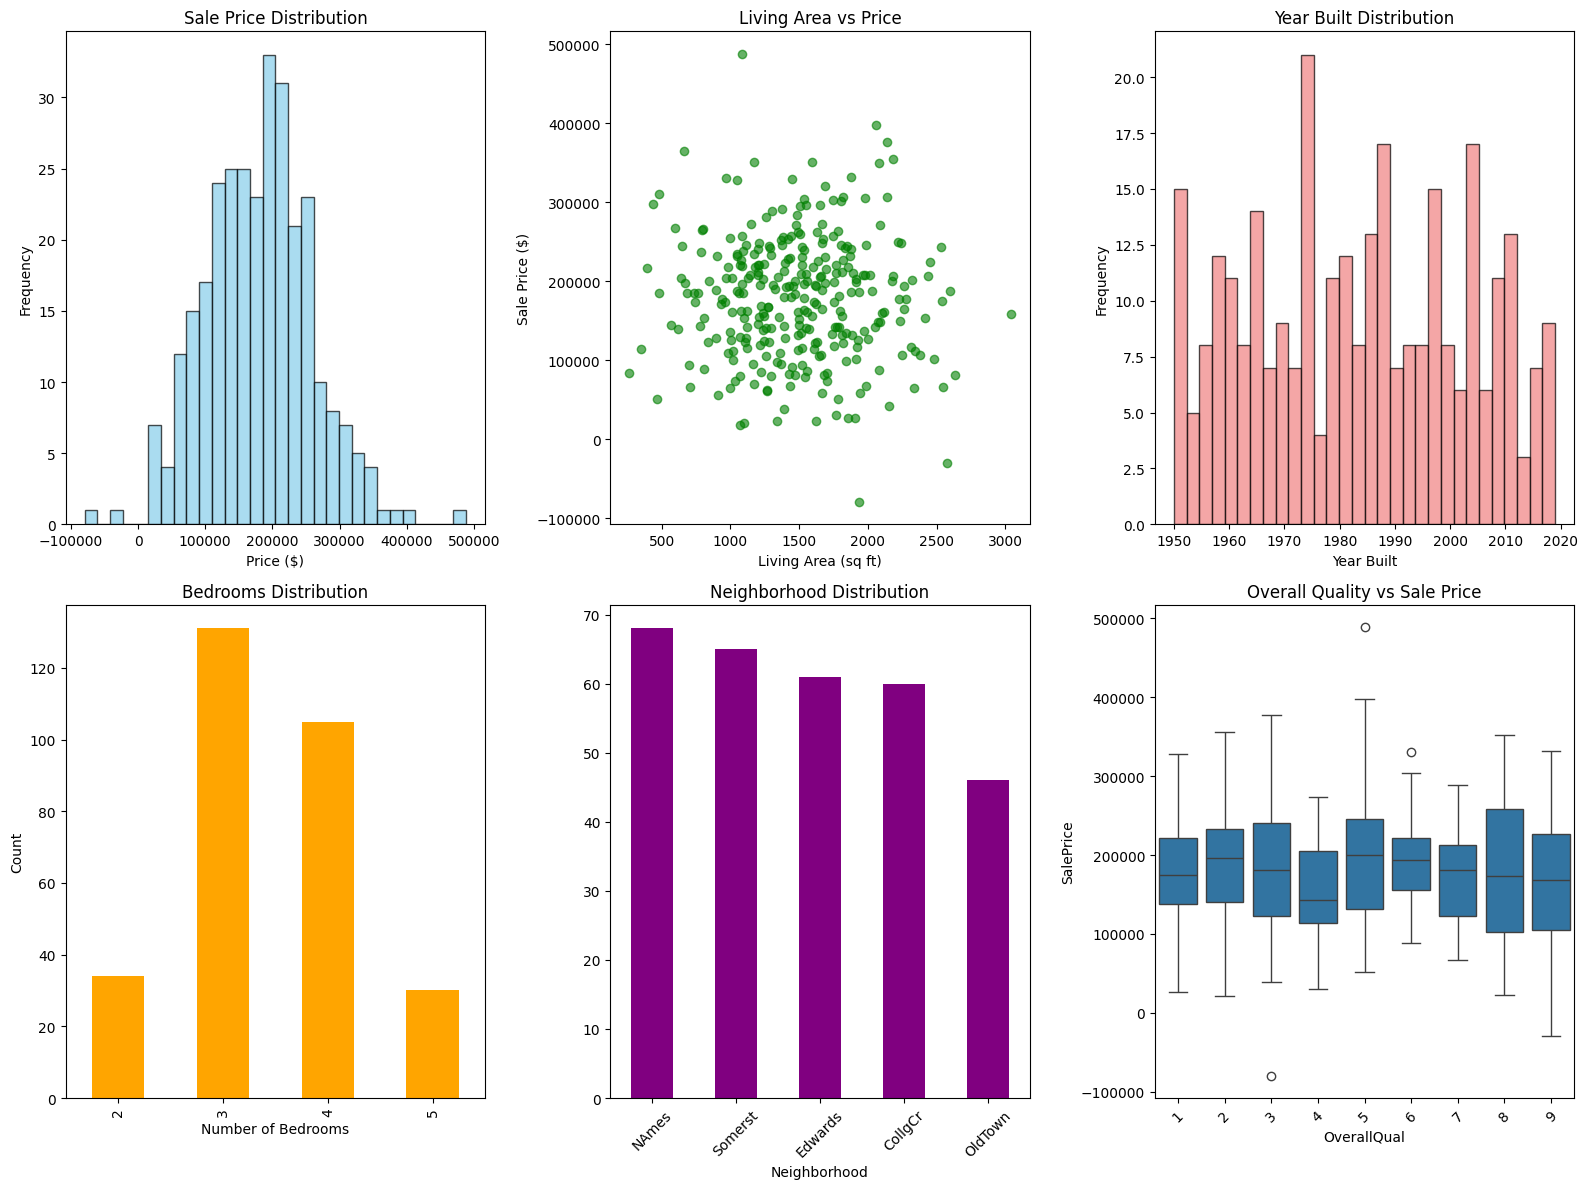

✅ Visualizations saved!


In [4]:
# Cell 4: Create visualizations
print("📈 CREATING VISUALIZATIONS...")
plt.figure(figsize=(16, 12))

# 1. Price distribution
plt.subplot(2, 3, 1)
plt.hist(housing_df['SalePrice'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Sale Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

# 2. Living area vs price
plt.subplot(2, 3, 2)
plt.scatter(housing_df['GrLivArea'], housing_df['SalePrice'], alpha=0.6, color='green')
plt.title('Living Area vs Price')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Sale Price ($)')

# 3. Year built distribution
plt.subplot(2, 3, 3)
plt.hist(housing_df['YearBuilt'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Year Built Distribution')
plt.xlabel('Year Built')
plt.ylabel('Frequency')

# 4. Bedrooms distribution
plt.subplot(2, 3, 4)
housing_df['BedroomAbvGr'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Bedrooms Distribution')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

# 5. Neighborhood distribution
plt.subplot(2, 3, 5)
housing_df['Neighborhood'].value_counts().plot(kind='bar', color='purple')
plt.title('Neighborhood Distribution')
plt.xticks(rotation=45)

# 6. Overall quality vs price
plt.subplot(2, 3, 6)
sns.boxplot(data=housing_df, x='OverallQual', y='SalePrice')
plt.title('Overall Quality vs Sale Price')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('../../reports/figures/week1_complete_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualizations saved!")